# INTERNAL DATASET

Este dataset contiene información detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:Este dataset contiene información interna detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from scipy.stats import skew, chi2_contingency
# from IPython.display import Markdown, display
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'Internal_Bank_Dataset.plk')
internal = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(internal, 5))
print('-' * 50)

# Resumen estadístico de los datos numéricos
print(internal.describe())

   PROSPECTID Total_TL Tot_Closed_TL Tot_Active_TL Total_TL_opened_L6M  \
0           1        5             4             1                   0   
1           2        1             0             1                   0   
2           3        8             0             8                   1   
3           4        1             0             1                   1   
4           5        3             2             1                   0   
5         ...      ...           ...           ...                 ...   
6       51332        3             0             3                   1   
7       51333        4             2             2                   0   
8       51334        2             1             1                   1   
9       51335        2             1             1                   0   
10      51336        1             0             1                   0   

   Tot_TL_closed_L6M pct_tl_open_L6M pct_tl_closed_L6M pct_active_tl  \
0                  0             0.0   

In [4]:
# Función que muestra la estructura de cada variable
for col in internal.columns.tolist():
    describe_columna(internal, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: Total_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 107
Valores más frecuentes:
1 	 16550
2 	 9269
3 	 5867
4 	 4027
5 	 2872
6 	 2267
7 	 1678
8 	 1321
9 	 1083
10 	 815
Columna: Tot_Closed_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 100
Valores más frecuentes:
0 	 18377
1 	 13055
2 	 5914
3 	 3334
4 	 2250
5 	 1613
6 	 1161
7 	 928
8 	 654
9 	 546
Columna: Tot_Active_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 32
Valores más frecuentes:
1 	 19163
2 	 9640
0 	 8519
3 	 5263
4 	 3091
5 	 1877
6 	 1247
7 	 795
8 	 543
9 	 385
Columna: Total_TL_opened_L6M  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valore

# TRAER LA VARIABLE CREDIT SCORING MEDIANTE UN JOIN

## 2. Calidad del Dato

### 2.1. Valores Nulos

Mostrar cuántos valores nulos hay por columna y su porcentaje

In [5]:
# Contamos la cantidad de valores nulos por columna
q_nulos = internal.isnull().sum()

# Filtramos solo las columnas que tienen valores nulos
q_nulos = q_nulos[q_nulos > 0]

# Calculamos el porcentaje de valores nulos respecto al total de filas
p_nulos = (q_nulos / len(internal) * 100).round(2)

# Creamos un DataFrame con la cantidad y el porcentaje de valores nulos
df_nulos = pd.DataFrame({
    'Cantidad': q_nulos,
    'Porcentaje': p_nulos
}).sort_values(by='Cantidad', ascending=False)

# Imprimimos el DataFrame resultante
print(df_nulos)

               Cantidad  Porcentaje
Age_Oldest_TL        40        0.08
Age_Newest_TL        40        0.08


In [6]:
# 
# x = (internal[internal['Age_Newest_TL'] == None]) & (internal[internal['Age_Newest_TL'] == None]) 
x = internal[internal['Age_Newest_TL'].isnull()].index
y = internal[internal['Age_Oldest_TL'].isnull()].index
x == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [7]:
pd.set_option('display.max_columns', None)
internal.loc[x, :].describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.0,40.0,40.000000,40.000000,40.0,40.0,40.0,40.0,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0,0.0
mean,25573.150000,1.175000,0.325000,0.850000,0.0,0.0,0.0,0.0,0.825000,0.175000,0.0,0.0,0.0,0.0,0.550000,0.025000,0.0,0.0,0.025000,0.025000,0.025000,0.475000,0.700000,1.075000,NaN,NaN
std,14955.318206,0.812956,1.022503,0.426675,0.0,0.0,0.0,0.0,0.384808,0.384808,0.0,0.0,0.0,0.0,0.503831,0.158114,0.0,0.0,0.158114,0.158114,0.158114,1.061868,0.464095,0.888314,NaN,NaN
min,533.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,12363.750000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
50%,27362.500000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
75%,37006.750000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN
max,50805.000000,6.000000,6.000000,2.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,6.000000,1.000000,6.000000,NaN,NaN


In [8]:
internal.loc[
    internal['Age_Oldest_TL'].isnull(), 'Age_Oldest_TL'
    ] = np.random.choice(internal['Age_Oldest_TL'].dropna(), size=internal['Age_Oldest_TL'].isnull().sum())

internal.loc[
    internal['Age_Oldest_TL'].isnull(), 'Age_Oldest_TL'
    ] = np.random.choice(internal['Age_Oldest_TL'].dropna(), size=internal['Age_Oldest_TL'].isnull().sum())



### 2.2. Agragación de c+Características

In [9]:
def agregacion_pca(df, n, *col):
    """
    Realiza una agregación de variables utilizando PCA, reduciendo las dimensiones
    de las columnas seleccionadas y manteniendo la variabilidad temporal.
    
    Parámetros:
    df: DataFrame de entrada con las columnas a analizar.
    n: Número de componentes principales a retener.
    *col: Columnas que se usarán para el PCA.
    
    Retorna:
    Una Serie o DataFrame con las componentes principales obtenidas.
    """
    # Comprobar que las columnas existen en el DataFrame
    for c in col:
        if c not in df.columns:
            raise ValueError(f"La columna '{c}' no está en el DataFrame.")
    
    # Selecciona y estandariza las columnas indicadas
    df_subset = df[list(col)]
    df_scaled = StandardScaler().fit_transform(df_subset)
    
    # Aplica PCA
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_scaled)
    
    # Si n=1, devolver una Serie con la componente principal
    if n == 1:
        return pd.Series(df_pca.flatten(), index=df.index)
    
    # Si n > 1, devolver un DataFrame con las componentes principales
    return pd.DataFrame(df_pca, index=df.index, columns=[f'PC{i+1}' for i in range(n)])

In [10]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'Total_TL_opened_pca': ['Total_TL_opened_L6M', 'Total_TL_opened_L12M'],
    'Tot_TL_closed_pca': ['Tot_TL_closed_L6M', 'Tot_TL_closed_L12M'],
    'pct_tl_open_pca': ['pct_tl_open_L6M', 'pct_tl_open_L12M'],
    'pct_tl_closed_pca': ['pct_tl_closed_L6M', 'pct_tl_closed_L12M']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    internal[new_col] = agregacion_pca(internal, 1, *variables)
    internal.drop(columns=variables, inplace=True)

In [11]:
internal.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,pct_active_tl,pct_closed_tl,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Total_TL_opened_pca,Tot_TL_closed_pca,pct_tl_open_pca,pct_tl_closed_pca
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51296.000000,5.133600e+04,5.133600e+04,5.133600e+04,5.133600e+04
mean,25668.500000,4.858598,2.770415,2.088184,0.577542,0.422458,0.546751,0.593268,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,45.386240,15.780022,6.228460e-17,-4.705948e-17,-2.519066e-17,-2.574430e-17
std,14819.571046,7.177116,5.941680,2.290774,0.379867,0.379867,1.085529,0.900585,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,41.748471,21.995676,1.355107e+00,1.359873e+00,1.266483e+00,1.327422e+00
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.034528e-01,-6.646849e-01,-1.151816e+00,-7.186218e-01
25%,12834.750000,1.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,-9.034528e-01,-6.646849e-01,-1.151816e+00,-7.186218e-01
50%,25668.500000,2.000000,1.000000,1.000000,0.556000,0.444000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000,-5.698141e-01,-6.646849e-01,-3.154722e-01,-7.186218e-01
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,0.750000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000,3.091354e-01,5.358740e-01,6.523669e-01,2.589630e-01
max,51336.000000,235.000000,216.000000,47.000000,1.000000,1.000000,34.000000,27.000000,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000,2.282818e+01,3.187159e+01,3.029903e+00,5.468623e+00


### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [12]:
# Creamos una variable con las variables numéricas
numeric_features = internal.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

In [13]:
# Diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers por columna
for column in numeric_features:
    # Calcular el rango intercuartílico y los límites
    Q1 = internal[column].quantile(0.25)
    Q3 = internal[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = internal[(internal[column] < lower_bound) | (internal[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostrar el recuento de outliers
print('Recuento de outliers por feature:')
for column, count in outlier_count.items():
    if count > 0:
        print(f'{column}: {count}')


Recuento de outliers por feature:
Total_TL: 4865
Tot_Closed_TL: 4704
Tot_Active_TL: 2536
Tot_Missed_Pmnt: 2373
Auto_TL: 1701
CC_TL: 4593
Consumer_TL: 6961
Gold_TL: 7472
Home_TL: 2715
PL_TL: 8618
Secured_TL: 4511
Unsecured_TL: 4687
Other_TL: 6072
Age_Oldest_TL: 2270
Age_Newest_TL: 5754
Total_TL_opened_pca: 3129
Tot_TL_closed_pca: 2412
pct_tl_closed_pca: 5341


In [14]:
# # Rango de valores para n_neighbors
# neighbors_range = range(1800,2301, 100)
# outlier_counts = []

# # Evaluar LOF para diferentes valores de n_neighbors
# for n in neighbors_range:
#     lof = LocalOutlierFactor(n_neighbors=n)
#     y_pred = lof.fit_predict(internal[numeric_features])
#     outliers = np.where(y_pred == -1)[0]
#     outlier_counts.append(len(outliers))

# # Graficar el número de outliers detectados en función de n_neighbors
# plt.figure(figsize=(10, 6))
# plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
# plt.title('Número de Outliers Detectados vs. n_neighbors')
# plt.xlabel('n_neighbors')
# plt.ylabel('Número de Outliers')
# plt.grid(True)
# plt.show()

# # Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
# outliers_dict = {}

# # Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
# for n, count in zip(neighbors_range, outlier_counts):
#     print(f'n_neighbors={n} -> Número de outliers: {count}')
#     outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# # Encontrar el valor de n_neighbors donde el count es máximo
# max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
# max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# # Imprimir el resultado
# print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# # Crear el modelo LOF con el valor de n_neighbors donde count es máximo
# lof = LocalOutlierFactor(n_neighbors=max_n)

# # Ajustar el modelo y predecir
# y_pred = lof.fit_predict(internal[numeric_features])

# # Obtener los índices de los outliers
# outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# # Filtrar los valores atípicos en el DataFrame
# outlier_values = internal.iloc[outliers]

# outlier_values.describe()

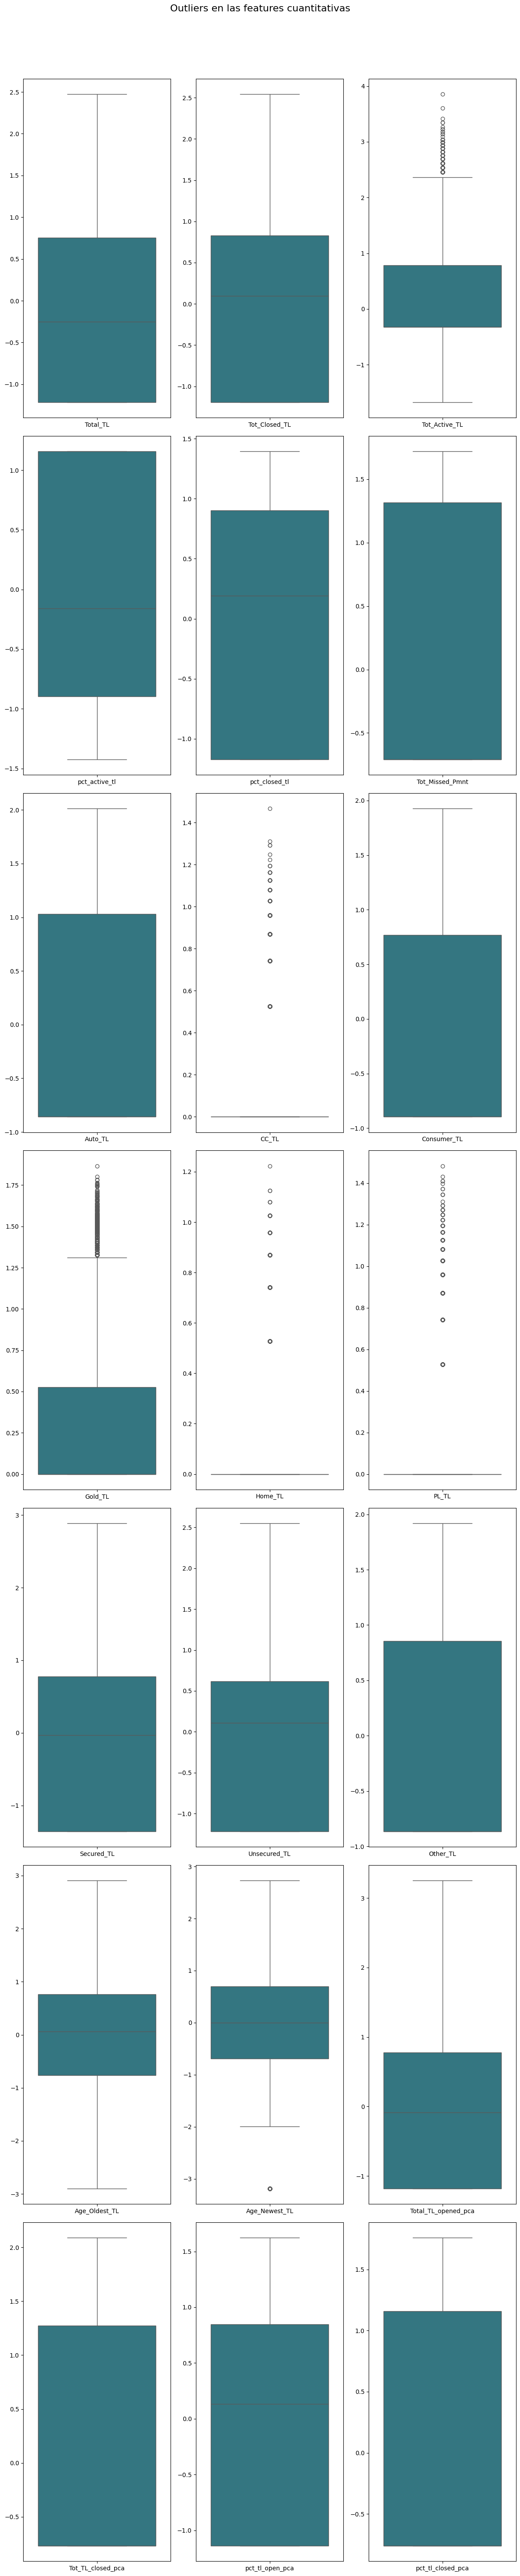

In [18]:
def plot_outliers_boxplots(df, numeric_features, palette='Set2', figsize=(12, 60)):
    """
    Dibuja boxplots para detectar outliers en las características numéricas.

    Parámetros:
    df: DataFrame que contiene los datos a visualizar.
    numeric_features: Lista de nombres de las columnas numéricas a analizar.
    palette: Paleta de colores para los gráficos (por defecto 'Set2').
    figsize: Tamaño de la figura para los subgráficos (por defecto (12, 60)).
    """
    # Configuración de estilo
    sns.set_palette(palette)

    color_viridis = sns.color_palette('viridis')[2]
    plt.figure(figsize=figsize)

    # Dibujar un boxplot por cada columna numérica
    for i, column in enumerate(numeric_features):
        plt.subplot(7, 3, i + 1)
        sns.boxplot(data=df[[column]], color=color_viridis) 

    # Mostrar título y ajustar el layout
    plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamada a la función
plot_outliers_boxplots(internal, numeric_features)

#### 2.3.2. Imputación de Outliers

#### 2.3.3. Transformación de las distribuciones

In [17]:
# Inicializar listas para variables transformadas
log_transformed = []
yeo_johnson_transformed = []

# Iterar sobre las características numéricas
for col in numeric_features:
    series = internal[col]
    
    # Si la asimetría es mayor que 1.5, aplicar transformación logarítmica
    if skew(series) > 1.5:
        internal[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        yeo_johnson = PowerTransformer(method='yeo-johnson')
        internal[col] = yeo_johnson.fit_transform(series.values.reshape(-1, 1)).flatten()
        yeo_johnson_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con Yeo-Johnson: {yeo_johnson_transformed}')

Variables transformadas con logaritmo: ['CC_TL', 'Gold_TL', 'Home_TL', 'PL_TL']
Variables transformadas con Yeo-Johnson: ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'pct_active_tl', 'pct_closed_tl', 'Tot_Missed_Pmnt', 'Auto_TL', 'Consumer_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'Total_TL_opened_pca', 'Tot_TL_closed_pca', 'pct_tl_open_pca', 'pct_tl_closed_pca']


ESTUDIAR VARIABLES CC_TL, HOME_TL Y PL_TL, VALORAR SU DISCRETIZACIÓN